<a href="https://colab.research.google.com/github/Reetabisht/Emotion-Sentiment-Analysis-using-ML-Models/blob/main/Emotion_Sentiment_Analysis_Machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##About Dataset
**Introduction:**

 "Emotions" dataset – a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. This dataset serves as a valuable resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media.

**About the Dataset:**

Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: **sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)**. Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.

**Key Features:**

**text:** A string feature representing the content of the Twitter message.

**label:** A classification label indicating the primary emotion, with values ranging from 0 to 5.


**Potential Use Cases:**

**1 Sentiment Analysis:** Uncover the prevailing sentiments in English Twitter messages across various emotions.

**2 Emotion Classification:** Develop models to accurately classify tweets into the six specified emotion categories.

**3 Textual Analysis:** Explore linguistic patterns and expressions associated with different emotional states.

In [ ]:
# Prior steps to follow to use  Kaggle Dataset Directly without downloading them into our local system.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d nelgiriyewithana/emotions

 96% 15.0M/15.7M [00:00<00:00, 25.2MB/s]
100% 15.7M/15.7M [00:00<00:00, 16.6MB/s]


In [ ]:
# Since our Dataset has been downloaded in zip format so our next aim is to unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/emotions.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
# Reading Data into dataframe
df = pd.read_csv('/content/text.csv')
df

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [ ]:
# Some basic checks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


## Text Preprocessing

In [ ]:
# Remove special Characters/links
import re # Regular expression
def text_cleaner(t):
  text = re.sub("[@&][A-Za-z)-9_]+",'',t) # removing mentions
  text = re.sub(r"http\S+",'',text) # removing websites links
  return pd.Series([text])


In [ ]:
# Adding new column in Dataset with cleaned text
df['Cleaned_text'] = df.text.apply(text_cleaner)
df

,Unnamed: 0,text,label,Cleaned_text
0,0,i just feel really helpless and heavy hearted,4,i just feel really helpless and heavy hearted
1,1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed being able to slouch about relax a...
2,2,i gave up my internship with the dmrg and am f...,4,i gave up my internship with the dmrg and am f...
3,3,i dont know i feel so lost,0,i dont know i feel so lost
4,4,i am a kindergarten teacher and i am thoroughl...,4,i am a kindergarten teacher and i am thoroughl...
...,...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2,i feel like telling these horny devils to find...
416805,416805,i began to realize that when i was feeling agi...,3,i began to realize that when i was feeling agi...
416806,416806,i feel very curious be why previous early dawn...,5,i feel very curious be why previous early dawn...
416807,416807,i feel that becuase of the tyranical nature of...,3,i feel that becuase of the tyranical nature of...


In [ ]:
# Converting all text to lowercase
df.Cleaned_text = df.Cleaned_text.str.lower()

In [ ]:
# Removing new line character
df.Cleaned_text = df.Cleaned_text.str.replace('\n',' ')

In [ ]:
# Cheching Null Values in whole datset
df.isnull().sum()

Unnamed: 0      0
text            0
label           0
Cleaned_text    0
dtype: int64

In [ ]:
# Checking Null values in Cleaned_text
df.isnull().sum().Cleaned_text

0

In [ ]:
# Replacing any empty string with null
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
if df.isnull().sum().Cleaned_text == 0:
  print('No empty string')
else:
  df.dropna(inplace=True)

No empty string


## Exploratory Data Analysis:

<Axes: xlabel='label', ylabel='count'>

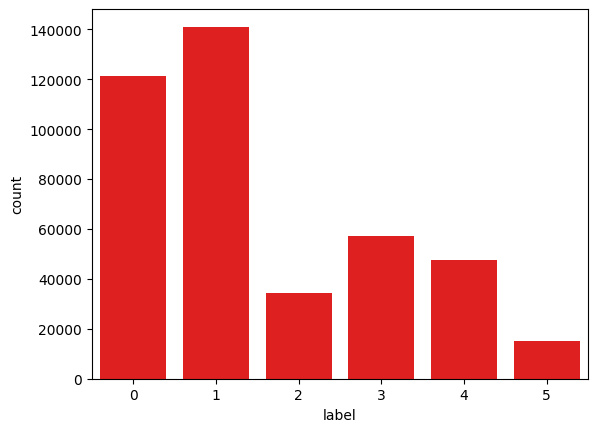

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data = df, x= 'label',color='red')

Joyfull text is Highest in the data.

In [ ]:
df['length'] = df['Cleaned_text'].apply(lambda x:len(x))
df['length']

0          45
1         234
2          63
3          26
4         222
         ... 
416804    132
416805    111
416806     90
416807    222
416808    132
Name: length, Length: 416809, dtype: int64

In [ ]:
df['length'].max()

830

In [ ]:
df['length'].min()

2

<ipython-input-25-fbde3f5e37c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label',y='length',data=df,palette='pastel')


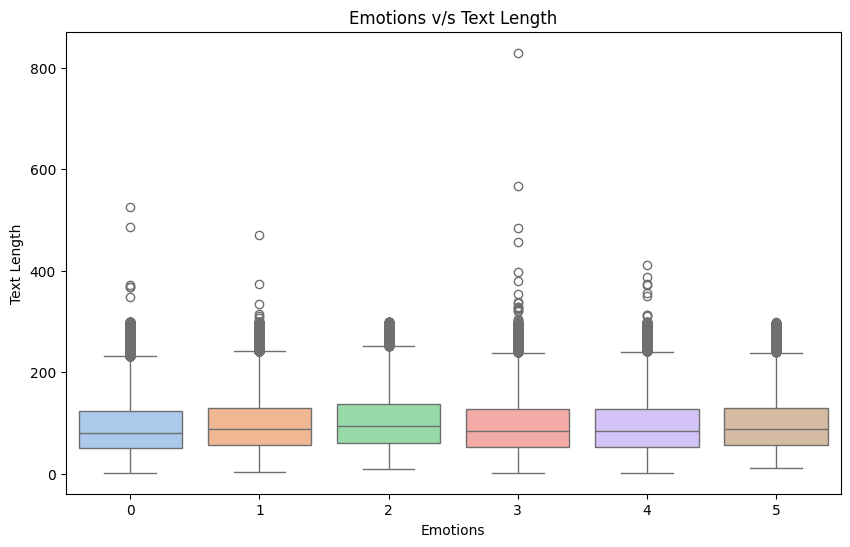

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='label',y='length',data=df,palette='pastel')
plt.title('Emotions v/s Text Length')
plt.xlabel('Emotions')
plt.ylabel('Text Length')
plt.show()

For Emotion Category 3 means Anger we have one text with maximum length 830 words.

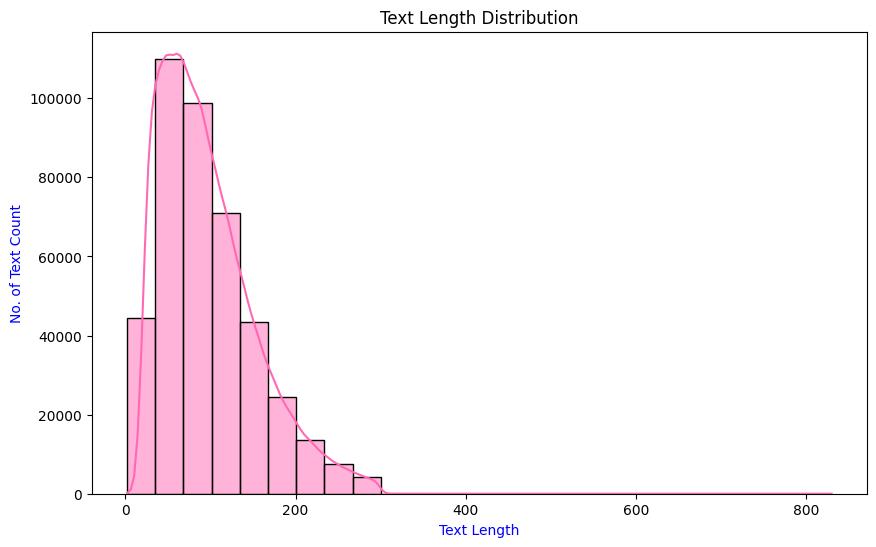

In [ ]:
# Text Distribution
plt.figure(figsize=(10,6))
sns.histplot(df,x='length',bins=25,kde=True,color='hotpink')
plt.title('Text Length Distribution')
plt.xlabel('Text Length',color='blue')
plt.ylabel('No. of Text Count',color='blue')
plt.show()

In [ ]:
df.head()

,Unnamed: 0,text,label,Cleaned_text,length
0,0,i just feel really helpless and heavy hearted,4,i just feel really helpless and heavy hearted,45
1,1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed being able to slouch about relax a...,234
2,2,i gave up my internship with the dmrg and am f...,4,i gave up my internship with the dmrg and am f...,63
3,3,i dont know i feel so lost,0,i dont know i feel so lost,26
4,4,i am a kindergarten teacher and i am thoroughl...,4,i am a kindergarten teacher and i am thoroughl...,222


In [ ]:
df.label.unique()

array([4, 0, 2, 1, 5, 3])

## Data preprocessing:

In [ ]:
df['label'].value_counts()

1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: label, dtype: int64

In [ ]:
# Creating input and Output Data
x = df['Cleaned_text']
y = df['label']

In [ ]:
# Splitting data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state=0)

In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(291766,) (291766,) (125043,) (125043,)


**Vectorization of text to identify emotions:**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=6000,stop_words='english') # We are taking Snetiment analysis for 6000 reviews
x_train_vec = vect.fit_transform(x_train)

In [ ]:
x_train_vec

<291766x6000 sparse matrix of type '<class 'numpy.int64'>'
	with 2164990 stored elements in Compressed Sparse Row format>

In [ ]:
type(x_train_vec)

scipy.sparse._csr.csr_matrix

In [ ]:
x_test_vec = vect.transform(x_test)

In [ ]:
type(x_test_vec)

scipy.sparse._csr.csr_matrix

# Machine Learning Models:

In [ ]:
# 1) XGBoost
from xgboost import XGBClassifier
from xgboost import XGBClassifier
xgb_model = XGBClassifier(objective='multi:softmax',num_class=6,random_state=42)
xgb_model.fit(x_train_vec,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6,
              num_parallel_tree=None, ...)

In [ ]:
# Model testing
y_pred = xgb_model.predict(x_test_vec)

In [ ]:
# Model Evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('\nModel Evaluation:')
print('Accuracy:', accuracy_score(y_test,y_pred))
print('\nClassification report:')
print(classification_report(y_test,y_pred))


Model Evaluation:
Accuracy: 0.8931967403213295

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     36204
           1       0.92      0.89      0.91     42374
           2       0.74      0.93      0.83     10411
           3       0.93      0.86      0.90     17277
           4       0.86      0.85      0.86     14241
           5       0.69      0.94      0.80      4536

    accuracy                           0.89    125043
   macro avg       0.85      0.90      0.87    125043
weighted avg       0.90      0.89      0.89    125043



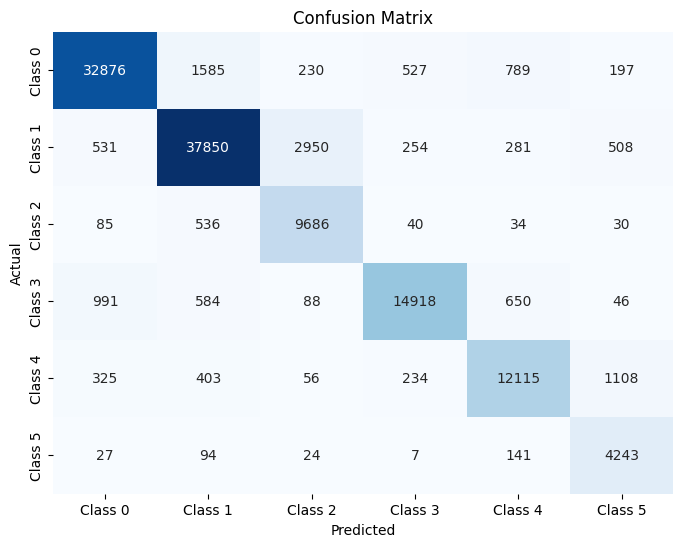

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5'],
            yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# 2 ) Naive Bayes

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(x_train_vec, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(x_test_vec)

# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92     36204
           1       0.90      0.91      0.91     42374
           2       0.79      0.77      0.78     10411
           3       0.91      0.88      0.89     17277
           4       0.85      0.85      0.85     14241
           5       0.78      0.71      0.74      4536

    accuracy                           0.89    125043
   macro avg       0.86      0.84      0.85    125043
weighted avg       0.89      0.89      0.89    125043



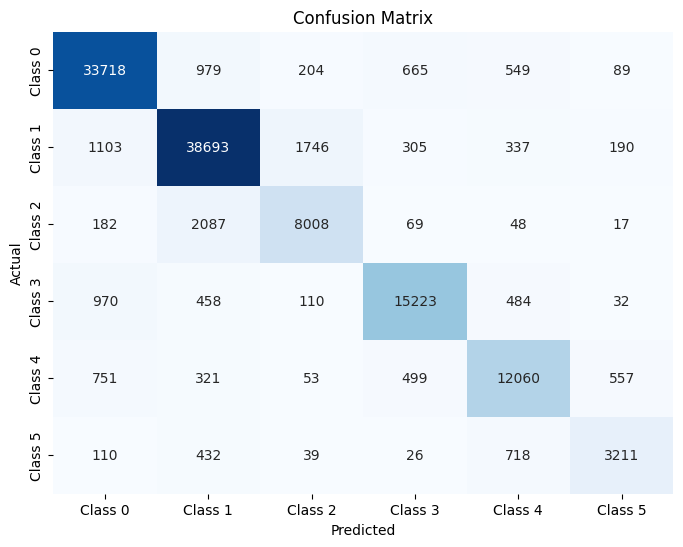

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5'],
            yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3','Class 4','Class 5'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

As we can see by above models XGBoost and Naive Bayes performance, that both the  models are providing  minimum 80% accuracy for all the classes. As comparining both the models XGBoost is performining much more better  than Naive Bayes in terms of Accuracy score for all the classes.

To Optimize the model performance we use perform some parameter tuning to get optimum result. Or else we can move to the some Deep Learning Concept with NN architecture like RNN,LSTm,GRU etc.....